In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv("dataset/recipes_82k.csv")

data.head()

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
0,NaN,['Set the racks in the middle and upper thirds...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,NaN,['Place the eggs in the air fryer basket and c...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,NaN,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,NaN,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],https://www.skinnytaste.com/wp-content/uploads...,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,NaN,['Cook potatoes in a large pot of salted water...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."


In [3]:
data.drop(columns=['category', 'image', 'serves', 'cuisine', 'prep_time'], inplace=True)

In [4]:
data.dropna(subset=['tags'], inplace=True)

In [5]:
data.head()

,cooking_method,ingredients,recipe_name,tags
0,['Set the racks in the middle and upper thirds...,"['1 tablespoons extra virgin olive oil', '1 cu...",Mediterranean Sea Bass,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,['Place the eggs in the air fryer basket and c...,"['4 large eggs', 'Salt (black pepper, everythi...",Air Fryer Hard Boiled Eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,"['Air Fryer directions:', 'Preheat air fryer t...","['olive oil spray', '4 about 5 ounce each salm...",Air Fryer Basil-Parmesan Salmon,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['1/2 cup freshly grated Parmesan (not pre-gra...,Everything Parmesan Crisps,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,['Cook potatoes in a large pot of salted water...,['3 1/2 pounds new potatoes (about 10 peeled a...,Potato and Green Bean Salad,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."


In [6]:
l = []
for x in data.tags:
    l.extend(x.split(','))
ls = []
for x in l:
    ls.append(x.strip())

In [9]:
ls[:10]

['Dairy Free',
 'Gluten Free',
 'Keto Recipes',
 'Kid Friendly',
 'Low Carb',
 'Under 30 Minutes',
 'Air Fryer Recipes',
 'Dairy Free',
 'Gluten Free',
 'Keto Recipes']

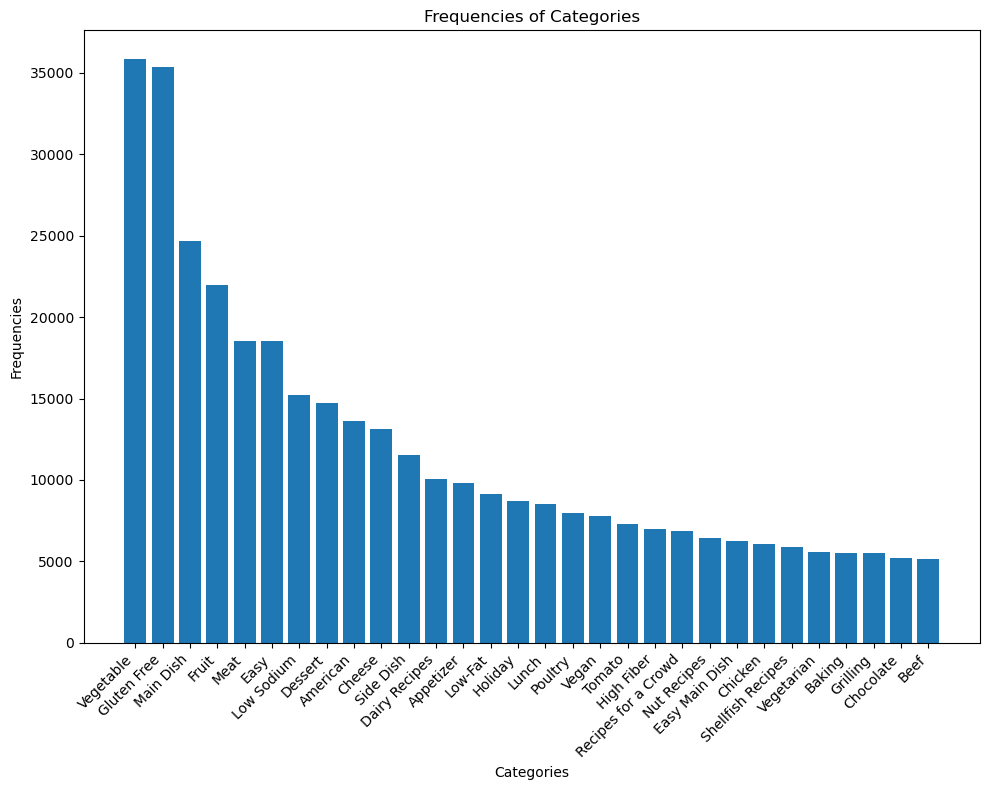

In [42]:
ls_unique = list(set(ls))

# This is the corresponding count for each value
counts = [ls.count(value) for value in ls_unique]

combined = list(zip(ls_unique, counts))

# Sort the combined list by the counts in descending order
sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)

# Unzip the sorted combined list into two lists
sorted_ls_unique, sorted_counts = zip(*sorted_combined)

plt.figure(figsize=(10, 8))
plt.bar(sorted_ls_unique[:30], sorted_counts[:30])

# Improve label positioning by rotating the labels
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees and align to the right

# Additional visual improvements
plt.title('Frequencies of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequencies')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping

# Show the plot
plt.show()



In [54]:
diets = {
    'vegetarian': ls.count(ls_unique[ls_unique.index('Vegetarian')]),
    'vegan': ls.count(ls_unique[ls_unique.index('Vegan')]),
    'gluten free': ls.count(ls_unique[ls_unique.index('Gluten Free')]),
    # 'dairy free': ls.count(ls_unique[ls_unique.index('Dairy Free')]),
    'low carb': ls.count(ls_unique[ls_unique.index('Low Carb')]) + ls.count(ls_unique[ls_unique.index('Low-Carb')]),
    'low fat': ls.count(ls_unique[ls_unique.index('Low-Fat')]),
    'low cholesterol': ls.count(ls_unique[ls_unique.index('Low-Cholesterol')]),
    'low sodium': ls.count(ls_unique[ls_unique.index('Low Sodium')]),
    'low calorie': ls.count(ls_unique[ls_unique.index('Low Calorie')]),
}

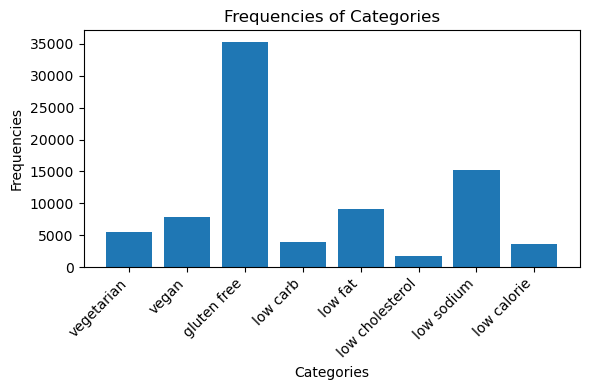

In [55]:
plt.figure(figsize=(6, 4))
plt.bar(diets.keys(), diets.values())

# Improve label positioning by rotating the labels
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees and align to the right

# Additional visual improvements
plt.title('Frequencies of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequencies')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping

# Show the plot
plt.show()

In [56]:
print(f'vegetarian: {ls.count(ls_unique[ls_unique.index('Vegetarian')])}')
print(f'vegan: {ls.count(ls_unique[ls_unique.index('Vegan')])}')
print(f'gluten free: {ls.count(ls_unique[ls_unique.index('Gluten Free')])}')
print(f'dairy free: {ls.count(ls_unique[ls_unique.index('Dairy Free')])}')
print(f'low carb: {ls.count(ls_unique[ls_unique.index('Low Carb')])}')
print(f'low sodium: {ls.count(ls_unique[ls_unique.index("Low Sodium")])}')
print(f'low calorie: {ls.count(ls_unique[ls_unique.index("Low Calorie")])}')
print(f'low-carb: {ls.count(ls_unique[ls_unique.index("Low-Carb")])}')
print(f'low-cholesterol: {ls.count(ls_unique[ls_unique.index("Low-Cholesterol")])}')
print(f'low-fat: {ls.count(ls_unique[ls_unique.index("Low-Fat")])}')


vegetarian: 5561
vegan: 7777
gluten free: 35363
dairy free: 417
low carb: 444
low sodium: 15249
low calorie: 3593
low-carb: 3510
low-cholesterol: 1759
low-fat: 9162


In [116]:
data[data['tags'].str.contains('Vegetarian')]

,cooking_method,ingredients,recipe_name,tags
1,['Place the eggs in the air fryer basket and c...,"['4 large eggs', 'Salt (black pepper, everythi...",Air Fryer Hard Boiled Eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
3,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['1/2 cup freshly grated Parmesan (not pre-gra...,Everything Parmesan Crisps,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,['Cook potatoes in a large pot of salted water...,['3 1/2 pounds new potatoes (about 10 peeled a...,Potato and Green Bean Salad,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."
5,"['To Make the soup:', 'Heat 1 tablespoon of oi...","['2 tablespoons high-heat oil', '1 medium yell...",Green Detox Soup with Toasted Hemp Gremolata,"Dairy Free, Gluten Free, Under 30 Minutes, Veg..."
7,['Combine sour cream and brown sugar and mix w...,"['16 oz strawberries (washed and cut)', '4 oz ...",Strawberries Romanoff,"Gluten Free, Kid Friendly, Low Carb, Under 30 ..."
...,...,...,...,...
82228,"['Place the flour, 3/4 teaspoon of salt, and t...","['1 1/4 cups all-purpose flour', 'Kosher salt ...",Zucchini and Goat Cheese Tart,"Vegetable,Zucchini Recipes,Cheese,Goat Cheese ..."
82237,"['Remove the ends of the zucchini and, if they...","['8 medium zucchini', 'Good olive oil', '2 lar...",Zucchini with Parmesan,"Vegetarian,Vegetable,Zucchini Recipes,Meat,Che..."
82238,['Bring 2 1/2 quarts of water to a rolling boi...,"['1 tablespoon salt, plus 1/4 teaspoon', '1 po...",Zucchini in a Yogurt Dressing,"Easy Main Dish,Easy,Main Dish,Skillet Recipes,..."
82241,"['Whisk together the lemon juice, olive oil, s...","['1 lemon, juiced', '1 tablespoon extra-virgin...","Zucchini with Green Peppercorns, Lemon, and Pa...","Easy Appetizer,Appetizer,Easy,Vegetarian,Ameri..."


In [117]:
data.iloc[26].ingredients

"['6 large or 7 medium ears of corn', '1/4 cup chopped red onion', '2 tablespoons extra virgin olive oil', '1/2 cup Feta (crumbled)', 'chopped fresh mint (cilantro or parsley)', '1/4 teaspoon kosher salt', 'black pepper (to taste)']"

In [118]:
data[(data['ingredients'].str.contains('Feta')) & (data['tags'].str.contains('Vegetarian'))]

,cooking_method,ingredients,recipe_name,tags
26,['Set the grill to medium-high. Husk the corn....,"['6 large or 7 medium ears of corn', '1/4 cup ...",Grilled Corn Salad with Feta,"Gluten Free, Kid Friendly, Under 30 Minutes, V..."
145,['Toss all the ingredients together and serve ...,"['8 cups chopped romaine lettuce', '1/2 Englis...",Chopped Feta Salad,"Gluten Free, Keto Recipes, Low Carb, Under 30 ..."
591,['Slice the widest part of a round watermelon ...,['1 watermelon slice (cut 1-inch thick from ce...,"Watermelon Feta and Balsamic ""Pizzas""","Gluten Free, Low Carb, Under 30 Minutes, Veget..."
3623,['Pecans: Combine sugar and cinnamon and set a...,"['1 tablespoon sugar', '1/2 teaspoon Spice Isl...","Assorted Greens with Feta, Cinnamon Dusted Pec...","Salad Recipes,Cheese,Feta,Nut Recipes,Main Dis..."
12525,['Pecans: Combine sugar and cinnamon and set a...,"['1 tablespoon sugar', '1/2 teaspoon Spice Isl...","Assorted Greens with Feta, Cinnamon Dusted Pec...","Salad Recipes,Cheese,Feta,Nut Recipes,Main Dis..."
34088,['In a kettle of boiling salted water cook the...,"['1/2 cup wheat', '1/2 cup spelt', '1/2 cup ry...",Feta Grain Salad,"Cucumber Salad,Cucumber,Salad Recipes,Vegetabl..."
34094,['Bring a large pot of salted water to a boil....,"['Kosher salt', '12 ounces penne pasta (prefer...","Feta & Herb ""Greek Salad"" Penne","Pasta Recipes,Penne Recipes,Cheese,Feta,Main D..."
36437,"['In a large bowl whisk together oil, vinegar,...","['3 tablespoons extra virgin olive oil', '2 ta...","Green Lentil, Sun-Dried Tomato, and Feta Salad","Easy Side Dish Recipes,Easy,Side Dish,Tomato S..."
37323,"['In a small bowl, whisk together the lemon ju...","['6 tablespoons freshly squeezed lemon juice',...",Greek Salad,"Cucumber Salad,Cucumber,Salad Recipes,Vegetabl..."
38183,"['First, marinate the cooked Gigante beans and...","['2 ounces Gigante beans, cooked', '8 baby art...","Grilled Baby Artichoke, Gigante Beans and Feta...","Artichoke Appetizer,Appetizer,Artichoke,Vegeta..."


In [63]:
l = []
for x in data.tags:
    l.extend(x.split(','))
ls = []
for x in l:
    ls.append(x.strip())

In [64]:
np.unique(ls)

array(['4th of July', 'Acorn Squash', 'African', 'Air Fryer Recipes',
       'Alfredo', 'Almond Recipes', 'American', 'Anchovy',
       'Andouille Sausage', 'Angel Food Cake', 'Antipasti', 'Appetizer',
       'Apple', 'Apple Butter', 'Apple Cake', 'Apple Cider',
       'Apple Cobbler', 'Apple Crisp', 'Apple Dessert', 'Apple Fritter',
       'Apple Pie', 'Apple Strudel', 'Applesauce', 'Apricot',
       'Argentinean Recipes', 'Artichoke', 'Artichoke Appetizer',
       'Artichoke Dip', 'Arugula', 'Asian', 'Asian Appetizer',
       'Asian Noodle', 'Asian Salad', 'Asparagus', 'Austrian Recipes',
       'Avocado', 'Award Show Recipes', 'Bacon Recipes', 'Baked Apple',
       'Baked Beans', 'Baked Chicken', 'Baked Fish', 'Baked Ham',
       'Baked Potato', 'Baked Salmon', 'Baked Spaghetti', 'Baked Tilapia',
       'Baking', 'Banana', 'Banana Bread', 'Banana Cake',
       'Banana Cream Pie', 'Banana Pudding', 'Banana Split',
       'Bananas Foster', 'Barbecue Restaurants', 'Barbecuing', 'Barley